<a href="https://colab.research.google.com/github/Zokhidabonu/AA-ClassMate/blob/main/Tutorial_3_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing the dataset and libraries

In [26]:
# Installing the dataset
%pip install kse801-dataset==0.1.0

# Installing the libraries
%pip install scikit-learn pandas numpy plotly nltk

# Hide warning messages
import warnings

warnings.simplefilter("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 7.3 MB/s eta 0:00:00


## Importing the dataset

In [27]:
from plotly import express as px
from plotly import graph_objects as go
import pandas as pd
import numpy as np
from IPython.display import display

from kse801 import load_crowdsignal_accel_phone # numerical
from kse801 import load_crowdsignal_heartrate_watch # numerical
from kse801 import load_crowdsignal_screen_phone # categorical
from kse801 import load_abc_activity # categorical
from kse801 import load_abc_location # locations (Korea #1)
from kse801 import load_kaist_location # locations (Korea #2)


# (Accelerometer data)
df_acc = load_crowdsignal_accel_phone()[['timestamps', 'x', 'y', 'z']].rename(columns={'timestamps': 'ts'})
df_acc.loc[:, 'smv'] = np.sqrt(df_acc.x ** 2 + df_acc.y ** 2 + df_acc.z ** 2)
df_acc.drop(labels=['x', 'y', 'z'], axis=1, inplace=True)

# (Heart rate data)
df_hr = load_crowdsignal_heartrate_watch()[['timestamps', 'rate']].rename(columns={'timestamps': 'ts', 'rate': 'hr'})

# (Screen state data)
df_screen = load_crowdsignal_screen_phone()[['timestamps', 'status']].rename(columns={'timestamps': 'ts', 'status': 'screen_state'})
df_screen.screen_state = df_screen.screen_state.map({'SCREEN_ON': 'ON', 'SCREEN_OFF': 'OFF'})

# (Activity data)
df_activity = load_abc_activity().rename(columns={'timestamp': 'ts', 'transition_type': 'activity'})

# (Location data)
df_loc = load_abc_location().rename(columns={'timestamp': 'ts'})
df_loc2 = load_kaist_location()[['timestamp', 'latitude', 'longitude']].rename(columns={'timestamp': 'ts'})
df_loc = df_loc.assign(ts=lambda x: x['ts'] - x['ts'].min()).sort_values('ts')


# Convert timestamp to human-readable format
for _df in [df_acc, df_hr, df_screen, df_activity, df_loc2]:
  _df.ts = pd.to_datetime(_df.ts, unit='ms')
  _df.set_index('ts', drop=True, inplace=True)
  _df.sort_index(inplace=True)


display(df_acc.head())
display(df_hr.head())
display(df_screen.head())
display(df_activity.head())
display(df_loc.head())
display(df_loc2.head())

,smv
ts,
2016-02-08 18:28:25.656222464,9.623096
2016-02-08 18:28:25.660105728,9.664458
2016-02-08 18:28:25.667091456,9.648537
2016-02-08 18:28:25.670696704,9.625014
2016-02-08 18:28:25.675807488,9.626700


,hr
ts,
2016-02-08 18:28:06.325639680,175.0
2016-02-08 18:28:06.684549120,176.0
2016-02-08 18:28:07.523516672,175.0
2016-02-08 18:28:07.636549632,175.0
2016-02-08 18:28:07.990551296,174.0


,screen_state
ts,
2016-02-08 18:31:53.552000000,OFF
2016-02-08 18:32:43.956999936,ON
2016-02-08 18:36:13.616000000,OFF
2016-02-08 18:36:16.232999936,ON
2016-02-08 18:39:49.088000000,OFF


,activity
ts,
2018-10-05 08:10:34.517,WALKING
2018-10-05 08:19:43.880,STILL
2018-10-05 09:23:09.141,WALKING
2018-10-05 09:38:28.850,STILL
2018-10-05 09:45:01.839,IN_VEHICLE


,ts,latitude,longitude
0,0,36.367065,127.364597
1,87334,36.366901,127.364559
2,214311,36.367132,127.364554
3,299662,36.367057,127.364600
4,1870285,36.367751,127.364217


,latitude,longitude
ts,,
2019-05-13 01:01:22.135,36.365607,127.369201
2019-05-13 01:19:09.244,36.367883,127.366893
2019-05-13 01:23:14.403,36.367927,127.366906
2019-05-13 01:23:17.096,36.367970,127.366968
2019-05-13 01:23:32.118,36.368020,127.367032


### Plot the imported data

In [28]:
# (Accelerometer)
px.line(
    df_acc.iloc[1_000:10_000],
    title='Accelerometer data (numerical)',
    height=300
).show()


# (Heart rate)
px.line(
    df_hr.iloc[1_000:10_000],
    title='Heart rate data (numerical)',
    height=300
).show()


# (Screen state)
px.scatter(
    x=df_screen.index,
    y=df_screen.screen_state,
    color=df_screen.screen_state,
    title='Screen state data (categorical)',
    height=300
).show()


# (Activity)
px.scatter(
    x=df_activity.index,
    y=df_activity.activity,
    color=df_activity.activity,
    title='Activity data (categorical)',
    height=300
).show()


# (Location)
import plotly.graph_objs as go
#@markdown For drawing GPS coordinates, we need a [MapBox](https://mapbox.com)'s access token.
MAPBOX_ACCESS_TOKEN = 'pk.eyJ1Ijoia2VsdHBvd2VyMCIsImEiOiJjazFiZ3cxZzUwMjVhM2hyMTBvcHYwcHlxIn0.mZTYvOHmJeqBANdFC1HFkw' #@param {type:"string"}
fig = go.Figure(
    data=[go.Scattermapbox(lat=df_loc.latitude, lon=df_loc.longitude)],
    layout=go.Layout(
        title='GPS Location data',
        autosize=True,
        mapbox=go.layout.Mapbox(
          accesstoken=MAPBOX_ACCESS_TOKEN,
          center=go.layout.mapbox.Center(
              lat=df_loc.iloc[0].latitude,
              lon=df_loc.iloc[0].longitude,
          ),
          zoom=12
      )
    )
)
fig.show()

## Transforming the <em>numerical</em> data

### Accelerometer features

In [29]:
# Window size parameters (input from user)
WIN_SIZE_IN_MIN = 3 #@param {type:"slider", min:3, max:10, step:1}
OVERLAP_RATIO = 0.5 #@param {type:"slider", min:0.2, max:0.8, step:0.1}
WIN_SIZE_IN_MS = WIN_SIZE_IN_MIN * 60 * 1000

# Window size parameters in datetime (human-readable) format
WIN_SIZE_DELTA = pd.Timedelta(
    WIN_SIZE_IN_MS,
    unit='ms'
)
SLIDE_DELTA = pd.Timedelta(
    int(WIN_SIZE_IN_MS * (1 - OVERLAP_RATIO)),
    unit='ms'
)


# (Accelerometer features)

# Container for accelerometer features
acc_features = []

# Process accelerometer data
win_start = df_acc.index.min()
win_end = win_start + WIN_SIZE_DELTA

while win_start < df_acc.index.max():

  # Step 1: Crop a segment of data
  df_acc_sub = df_acc[(win_start <= df_acc.index) & (df_acc.index < win_end)]

  # Step 2: Transform the segment to features (i.e., compute features)
  acc_features.append([
      df_acc_sub.index.max(), # timestamp
      df_acc_sub.smv.mean(), # mean Signal Magnitude Vector (SMV) value
      df_acc_sub.smv.min(), # minimum SMV
      df_acc_sub.smv.max(), # maximum SMV
      df_acc_sub.smv.std(), # standard deviation of SMV
      df_acc_sub.smv.median(), # median SMV
      df_acc_sub.smv.quantile(0.25), # 25th percentile of SMV
      df_acc_sub.smv.quantile(0.75), # 75th percentile of SMV
      df_acc_sub.smv.skew(), # Skewness
      df_acc_sub.smv.kurtosis() # Kurtosis
  ])

  # Step 3: Slide the window
  win_start += SLIDE_DELTA
  win_end += SLIDE_DELTA


# Make a dataframe of features
df_acc_features = pd.DataFrame(acc_features, columns=[
    'ts',
    'smv_mean',
    'smv_min',
    'smv_max',
    'smv_std',
    'smv_median',
    'smv_25q',
    'smv_75q',
    'smv_skew',
    'smv_kurtosis'
])
df_acc_features.set_index('ts', drop=True, inplace=True)
df_acc_features.sort_index(inplace=True)

px.line(
    df_acc.iloc[1_000:10_000],
    title='Original accelerometer data',
    height=300
).show()
px.line(
    df_acc_features,
    title='Accelerometer features',
    height=300
).show()

df_acc_features.head()

,smv_mean,smv_min,smv_max,smv_std,smv_median,smv_25q,smv_75q,smv_skew,smv_kurtosis
ts,,,,,,,,,
2016-02-08 18:31:25.652236800,9.624497,6.021674,16.186493,0.063611,9.622973,9.610044,9.635954,30.647221,3647.640222
2016-02-08 18:32:55.654827776,9.629073,2.105417,20.057041,0.290234,9.622753,9.609367,9.635829,7.280914,267.020114
2016-02-08 18:34:25.652886272,9.632674,2.105417,22.981997,0.411541,9.622203,9.607364,9.637067,6.779058,193.969201
2016-02-08 18:35:55.651069952,9.628368,4.105283,22.981997,0.293688,9.624124,9.609387,9.639228,11.714843,500.115802
2016-02-08 18:37:25.655313152,9.626550,5.689546,19.677271,0.193830,9.624464,9.610217,9.639899,5.966022,511.672110


#### Apply feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_acc_features_scaled = pd.DataFrame(
    scaler.fit_transform(df_acc_features),
    columns=df_acc_features.columns,
    index=df_acc_features.index
)

px.line(
    df_acc_features_scaled,
    title='Accelerometer features (scaled)',
    height=300
).show()

df_acc_features_scaled.head()

,smv_mean,smv_min,smv_max,smv_std,smv_median,smv_25q,smv_75q,smv_skew,smv_kurtosis
ts,,,,,,,,,
2016-02-08 18:31:25.652236800,-0.522821,1.173475,-1.166165,-0.918902,-0.343878,0.093485,-0.495939,5.252563,5.503293
2016-02-08 18:32:55.654827776,-0.519518,-0.320935,-0.634573,-0.796130,-0.344047,0.092044,-0.495989,0.733041,0.076301
2016-02-08 18:34:25.652886272,-0.516919,-0.320935,-0.232851,-0.730413,-0.344471,0.087774,-0.495494,0.635972,-0.040969
2016-02-08 18:35:55.651069952,-0.520027,0.442197,-0.232851,-0.794259,-0.342992,0.092086,-0.494630,1.590654,0.450495
2016-02-08 18:37:25.655313152,-0.521340,1.046738,-0.686731,-0.848356,-0.342730,0.093854,-0.494362,0.478714,0.469047


### Heart rate features

In [34]:
### TBD: compute features for heart rate (HR) data

WIN_SIZE_MIN = 2
OVERLAP = 0.5

WIN_SIZE_TD = pd.Timedelta(WIN_SIZE_MIN, unit='m')
SLIDE_TD = pd.Timedelta(int(WIN_SIZE_MIN * (1 - OVERLAP)), unit='m')

win_start = df_hr.index.min()
win_end = win_start + WIN_SIZE_TD

hr_features = []

while win_start < df_hr.index.max():
  # crop / cut
  df_hr_sub = df_hr[(win_start <= df_hr.index) & (df_hr.index < win_end)]

  # compute features
  hr_features.append([
      win_end,
      df_hr_sub.hr.mean(),
      df_hr_sub.hr.min(),
      df_hr_sub.hr.max(),
      df_hr_sub.hr.std(),
      df_hr_sub.hr.median(),
      df_hr_sub.hr.quantile(0.25),
      df_hr_sub.hr.quantile(0.75),
      df_hr_sub.hr.skew(),
      df_hr_sub.hr.kurtosis()
  ])

  # slide the window
  win_start += SLIDE_TD
  win_end += SLIDE_TD

df_hr_features = pd.DataFrame(hr_features, columns=[
    'ts',
    'hr_mean',
    'hr_min',
    'hr_max',
    'hr_std',
    'hr_median',
    'hr_25',
    'hr_75',
    'hr_skew',
    'hr_kurtosis'
])
df_hr_features.set_index('ts', drop=True, inplace=True)
df_hr_features.sort_index(inplace=True)

display(df_hr_features.head())

px.line(df_hr_features, height=300).show()

,hr_mean,hr_min,hr_max,hr_std,hr_median,hr_25,hr_75,hr_skew,hr_kurtosis
ts,,,,,,,,,
2016-02-08 18:30:06.325639680,155.467662,141.0,176.0,8.012503,156.0,148.00,161.00,0.184720,-0.403155
2016-02-08 18:31:06.325639680,150.449074,134.0,163.0,7.641819,151.0,144.00,157.00,-0.219293,-0.991731
2016-02-08 18:32:06.325639680,150.946281,134.0,170.0,9.250390,151.0,142.25,157.75,0.173502,-0.935853
2016-02-08 18:33:06.325639680,157.838174,137.0,173.0,9.310095,161.0,151.00,164.00,-0.723842,-0.613031
2016-02-08 18:34:06.325639680,158.186235,134.0,173.0,7.679937,159.0,156.00,162.50,-1.024815,1.261928


In [35]:
### TBD: scale the computed features from heart rate (HR) data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_hr_features_scaled = pd.DataFrame(
    scaler.fit_transform(df_hr_features),
    columns=df_hr_features.columns,
    index=df_hr_features.index
)

px.line(df_hr_features_scaled, height=300).show()

## Transforming the <em>categorical</em> data

### One-hot encoding

In [41]:
from IPython.display import display
import pandas as pd

print('Original screen state data:')
display(df_screen.head())

print('Encoded screen state data:')
df_screen_encoded = pd.get_dummies(df_screen, columns=['screen_state'], drop_first=True)
display(df_screen_encoded.head())

Original screen state data:


,screen_state
ts,
2016-02-08 18:31:53.552000000,OFF
2016-02-08 18:32:43.956999936,ON
2016-02-08 18:36:13.616000000,OFF
2016-02-08 18:36:16.232999936,ON
2016-02-08 18:39:49.088000000,OFF


Encoded screen state data:


,screen_state_ON
ts,
2016-02-08 18:31:53.552000000,False
2016-02-08 18:32:43.956999936,True
2016-02-08 18:36:13.616000000,False
2016-02-08 18:36:16.232999936,True
2016-02-08 18:39:49.088000000,False


In [37]:
print('Original activity data:')
display(df_activity.head())

df_activity_encoded = pd.get_dummies(df_activity, columns=['activity'], drop_first=True)
print('Encoded activity data (One-hot encoding):')
display(df_activity_encoded.head())

Original activity data:


,activity
ts,
2018-10-05 08:10:34.517,WALKING
2018-10-05 08:19:43.880,STILL
2018-10-05 09:23:09.141,WALKING
2018-10-05 09:38:28.850,STILL
2018-10-05 09:45:01.839,IN_VEHICLE


Encoded activity data (One-hot encoding):


,activity_ON_BICYCLE,activity_RUNNING,activity_STILL,activity_WALKING
ts,,,,
2018-10-05 08:10:34.517,False,False,False,True
2018-10-05 08:19:43.880,False,False,True,False
2018-10-05 09:23:09.141,False,False,False,True
2018-10-05 09:38:28.850,False,False,True,False
2018-10-05 09:45:01.839,False,False,False,False


### Time- and frequency-domain features

In [38]:
# Compute activity durations
df_activity.reset_index(inplace=True)

df_activity['duration_sec'] = (df_activity.ts.shift(-1) - df_activity.ts).dt.total_seconds()
df_activity.duration_sec.fillna(0, inplace=True)

if 'level_0' in df_activity.columns:
  df_activity.drop('level_0', axis=1, inplace=True)

if 'index' in df_activity.columns:
  df_activity.drop('index', axis=1, inplace=True)
df_activity.set_index('ts', inplace=True)
df_activity.head()

,activity,duration_sec
ts,,
2018-10-05 08:10:34.517,WALKING,549.363
2018-10-05 08:19:43.880,STILL,3805.261
2018-10-05 09:23:09.141,WALKING,919.709
2018-10-05 09:38:28.850,STILL,392.989
2018-10-05 09:45:01.839,IN_VEHICLE,347.873


In [39]:
df_activity.activity.unique()

array(['WALKING', 'STILL', 'IN_VEHICLE', 'RUNNING', 'ON_BICYCLE'],
      dtype=object)

In [40]:
# TBD: Time-domain - compute how long each state occurred in each window

WIN_SIZE_MS = 24 * 60 * 60 * 1000 # 24 hours in milliseconds
OVERLAP = 0.5

WIN_SIZE_TD = pd.Timedelta(WIN_SIZE_MS, unit='ms')
SLIDE_TD = pd.Timedelta(int(WIN_SIZE_MS * (1 - OVERLAP)), unit='ms')

win_start = df_activity.index.min()
win_end = win_start + WIN_SIZE_TD

td_features = []

while win_start < df_activity.index.max():
  # crop / cut
  df_activity_sub = df_activity[(win_start <= df_activity.index) & (df_activity.index < win_end)]

  # compute features
  walking_dur = df_activity_sub[df_activity_sub.activity == 'WALKING'].duration_sec.sum()
  still_dur = df_activity_sub[df_activity_sub.activity == 'STILL'].duration_sec.sum()
  vehicle_dur = df_activity_sub[df_activity_sub.activity == 'IN_VEHICLE'].duration_sec.sum()
  running_dur = df_activity_sub[df_activity_sub.activity == 'RUNNING'].duration_sec.sum()
  bicycle_dur = df_activity_sub[df_activity_sub.activity == 'ON_BICYCLE'].duration_sec.sum()
  td_features.append([
      win_end,
      walking_dur,
      still_dur,
      vehicle_dur,
      running_dur,
      bicycle_dur
  ])

  # slide the window
  win_start += SLIDE_TD
  win_end += SLIDE_TD

df_td_features = pd.DataFrame(td_features, columns=[
    'ts',
    'walking_dur',
    'still_dur',
    'vehicle_dur',
    'running_dur',
    'bicycle_dur'
])
df_td_features.set_index('ts', drop=True, inplace=True)
df_td_features.sort_index(inplace=True)

df_td_features_scaled = pd.DataFrame(
    scaler.fit_transform(df_td_features),
    columns=df_td_features.columns,
    index=df_td_features.index
)

display(df_td_features_scaled.head())

px.line(df_td_features_scaled, height=300).show()

,walking_dur,still_dur,vehicle_dur,running_dur,bicycle_dur
ts,,,,,
2018-10-06 08:10:34.517,0.264797,0.933496,0.303455,0.000000,0.0
2018-10-06 20:10:34.517,0.370032,1.000000,0.260883,0.000000,0.0
2018-10-07 08:10:34.517,0.856658,0.816004,0.152565,0.000000,0.0
2018-10-07 20:10:34.517,0.939372,0.668650,0.214788,0.250473,0.0
2018-10-08 08:10:34.517,0.526576,0.905343,0.139727,0.250473,0.0


In [42]:
# TBD: Frequency-domain - compute frequently was the screen turned on/off in a window?

## Transforming the <em>mobility</em> data (DBScan clustering)

### Brief visual on how DBSCAN selects the center of a cluster

In [43]:
import plotly.graph_objs as go
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

EPSILON_METRE = 500 #@param {type:"slider", min:25, max:500, step:25}
MIN_POINTS = 5 #@param {type:"slider", min:5, max:30, step:1}
R = 63710088 # Earth radius in metre

cluster = DBSCAN(
    eps=EPSILON_METRE / R,
    min_samples=MIN_POINTS,
    metric='haversine',
    algorithm='ball_tree'
)
loc_degrees = df_loc.loc[:, ['latitude', 'longitude']].to_numpy()
loc_radians = np.radians(loc_degrees) # To use haversine distance, degree should be transformed into radians
labels = cluster.fit_predict(loc_radians)

CLUSTER_DBSCAN = pd.DataFrame(
    np.column_stack([df_loc.to_numpy(), labels]),
    columns=['timestamp', 'latitude', 'longitude', 'label']
)

# Visualize
fig = go.Figure()

for label in CLUSTER_DBSCAN.loc[:, 'label'].unique():
  sub = CLUSTER_DBSCAN.loc[lambda x: x['label'] == label, :]

  fig.add_trace(
      go.Scattermapbox(
          lat=sub.loc[:, 'latitude'],
          lon=sub.loc[:, 'longitude'],
          name='None' if label == -1 else label,
          opacity=0.2 if label == -1 else 1.0,
          hovertext='None' if label == -1 else label,
      )
  )

fig.update_layout(
    autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            lat=df_loc.loc[0, 'latitude'],
            lon=df_loc.loc[0, 'longitude'],
        ),
        zoom=12
    )
)
fig.show()

CLUSTER_DBSCAN.head()


,timestamp,latitude,longitude,label
0,0.0,36.367065,127.364597,0.0
1,87334.0,36.366901,127.364559,0.0
2,214311.0,36.367132,127.364554,0.0
3,299662.0,36.367057,127.364600,0.0
4,1870285.0,36.367751,127.364217,0.0


<Axes: >

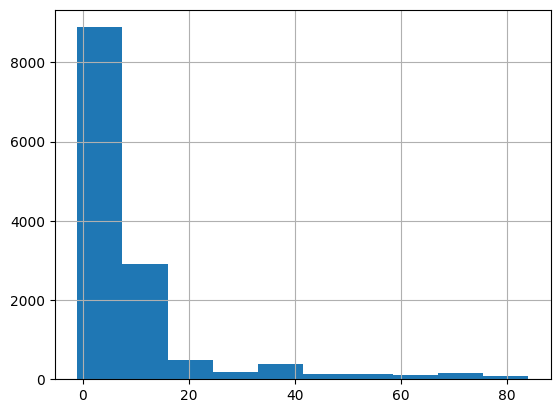

In [44]:
CLUSTER_DBSCAN.label.hist()

## Transforming unstructured data - Free text

In [45]:
text = 'I was feeling really bad yesterday. Got fired at work.'

print('Original text')
print(text)

Original text
I was feeling really bad yesterday. Got fired at work.


### Tokenization

In [46]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

# Container for tokenized data
tokenized_data = []

# Sentence tokenizer
sentences = sent_tokenize(text)
for i, _sentence in enumerate(sentences):
  tokenized_data.append([])
  print(f'Sentence {i + 1}: ', _sentence)

  # Word tokenizer
  words = word_tokenize(_sentence)
  for j, _word in enumerate(words):
    if _word == '.':
      continue
    print(f'Word {j + 1}: ', _word)
    tokenized_data[-1].append(_word)

print()
print('Resulting data')
print(tokenized_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentence 1:  I was feeling really bad yesterday.
Word 1:  I
Word 2:  was
Word 3:  feeling
Word 4:  really
Word 5:  bad
Word 6:  yesterday
Sentence 2:  Got fired at work.
Word 1:  Got
Word 2:  fired
Word 3:  at
Word 4:  work

Resulting data
[['I', 'was', 'feeling', 'really', 'bad', 'yesterday'], ['Got', 'fired', 'at', 'work']]


### Lower case

In [47]:
for i in range(len(tokenized_data)):
  for j in range(len(tokenized_data[i])):
    tokenized_data[i][j] = tokenized_data[i][j].lower()

print('Resulting data')
print(tokenized_data)

Resulting data
[['i', 'was', 'feeling', 'really', 'bad', 'yesterday'], ['got', 'fired', 'at', 'work']]


### Stemming + Lemmatization

In [48]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')


stemmed_data = tokenized_data.copy()

ps = PorterStemmer()
lemm = WordNetLemmatizer()
for i in range(len(tokenized_data)):
  for j in range(len(tokenized_data[i])):
    stemmed_data[i][j] = lemm.lemmatize(stemmed_data[i][j], pos=wordnet.VERB)
    # stemmed_data[i][j] = ps.stem(tokenized_data[i][j])

print('Resulting data')
print(stemmed_data)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Resulting data
[['i', 'be', 'feel', 'really', 'bad', 'yesterday'], ['get', 'fire', 'at', 'work']]


### Stop word removal

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')

_stopwords = set(stopwords.words('english'))

res_data = stemmed_data.copy()

rem_idx = []
for i in range(len(tokenized_data)):
  for j in range(len(tokenized_data[i])):
    if tokenized_data[i][j] in _stopwords:
      rem_idx.append((i, j))

rem_idx.sort(reverse=True)
for i, j in rem_idx:
  del res_data[i][j]
  if not res_data[i]:
    del res_data[i]

print('Resulting data')
print(res_data)

Resulting data
[['feel', 'really', 'bad', 'yesterday'], ['get', 'fire', 'work']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
